<a href="https://colab.research.google.com/github/carolina-garay/AnalisisYCuracion_Grupo32/blob/carolina_Garay_AyC/AEyC_Parte2__Garay_vfinal_sest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones** *Edición 2022*

#**Análisis Exploratorio y Curación de Datos**



----

# Trabajo Práctico Entregable - Parte 2
*Grupo 32*

Integrantes: 
- Garay, Carolina del Valle
- Ormaechea, Sebastián Gabriel
- Ramos, Pablo Nicolás

En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [ ]:
!pip install category_encoders

In [39]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
from google.colab import files
import joblib 
from sklearn import preprocessing
from category_encoders import one_hot


import seaborn as sns
sns.set_context('talk')

In [7]:
# Descarga de base de datos
!gdown https://drive.google.com/file/d/16kvZnsWXzgRePzVWN3nJ5LYcwyHNm9Rv/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=16kvZnsWXzgRePzVWN3nJ5LYcwyHNm9Rv
To: /content/Merge_a8.csv
100% 2.72M/2.72M [00:00<00:00, 198MB/s]


In [8]:
# Lectura de csv y obtención de dataframe 
airmelb=pd.read_csv('/content/Merge_a8.csv')

Realizamos exploración del dataset antes de resolver las consignas

In [9]:
airmelb.head()

,Regionname,Suburb,Type,YearBuilt,BuildingArea,Car,Price,Postcode,Rooms,zipcode,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,1480000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
1,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,1480000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
2,Northern Metropolitan,Abbotsford,h,1900.0,79.0,0.0,1035000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
3,Northern Metropolitan,Abbotsford,h,1900.0,79.0,0.0,1035000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
4,Northern Metropolitan,Abbotsford,h,1900.0,150.0,0.0,1465000.0,3067.0,3,3067.0,157.0,140.292994,236.250000,956.363636


In [10]:
#Imprimimos columnas que registran valores nulos
airmelb.isnull().any(axis=0)

Regionname                 False
Suburb                     False
Type                       False
YearBuilt                   True
BuildingArea                True
Car                        False
Price                      False
Postcode                   False
Rooms                      False
zipcode                     True
AirB_record_count           True
AirB_daily_price_mean       True
AirB_weekly_price_mean      True
AirB_monthly_price_mean     True
dtype: bool

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


#**RESOLUCIÓN EJERCICIO 1**

1.1 Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

**En este item se pide seleccionar  todas las filas y columnas del conjunto de datos, a excepción de `BuildingArea` y `YearBuilt` que serán imputadas en los ejercios siguientes porque poseen valores NAN. Pero observamos que además de estos dos atributos, hay cinco más que también tienen registros con valores NAN. Esto nos indica que más adelante también deberemos imputar esas variables.**

In [11]:
airmelb.columns

Index(['Regionname', 'Suburb', 'Type', 'YearBuilt', 'BuildingArea', 'Car',
       'Price', 'Postcode', 'Rooms', 'zipcode', 'AirB_record_count',
       'AirB_daily_price_mean', 'AirB_weekly_price_mean',
       'AirB_monthly_price_mean'],
      dtype='object')

In [12]:
#Selección de columnas
df= airmelb[['Regionname', 'Suburb', 'Type','Car', 'Price', 'Postcode', 'Rooms',
        'AirB_record_count', 'AirB_daily_price_mean',
       'AirB_weekly_price_mean', 'AirB_monthly_price_mean']]

In [13]:
df[:3]

,Regionname,Suburb,Type,Car,Price,Postcode,Rooms,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,Northern Metropolitan,Abbotsford,h,1.0,1480000.0,3067.0,2,157.0,140.292994,236.250000,956.363636
1,Northern Metropolitan,Abbotsford,h,1.0,1480000.0,3067.0,2,101.0,115.594059,735.352941,2863.900000
2,Northern Metropolitan,Abbotsford,h,0.0,1035000.0,3067.0,2,157.0,140.292994,236.250000,956.363636



1.2 Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

**Para resolver este ejercicio utilizamos la librería *category_encoders*. Dicha librería es conjunto de transformadores de estilo scikit-learn para codificar variables categóricas en numéricas. Aplicamos la codificación únicamente a las variables categóricas.**

In [14]:
#Imprimimos tipo de dato de cada columna
df.dtypes

Regionname                  object
Suburb                      object
Type                        object
Car                        float64
Price                      float64
Postcode                   float64
Rooms                        int64
AirB_record_count          float64
AirB_daily_price_mean      float64
AirB_weekly_price_mean     float64
AirB_monthly_price_mean    float64
dtype: object

In [15]:
#Imprimimos nombre de cada columna
df.columns

Index(['Regionname', 'Suburb', 'Type', 'Car', 'Price', 'Postcode', 'Rooms',
       'AirB_record_count', 'AirB_daily_price_mean', 'AirB_weekly_price_mean',
       'AirB_monthly_price_mean'],
      dtype='object')

In [16]:
#Separamos por variables categóricas y numéricas
categorical_cols_i = ['Regionname','Suburb', 'Type']
numerical_cols = ['Car', 'Price', 'Postcode', 'Rooms',
        'AirB_record_count', 'AirB_daily_price_mean',
       'AirB_weekly_price_mean', 'AirB_monthly_price_mean']

Inspeccionamos las variables categóricas

In [17]:
#Imprimimos cantidad de categorías que toma cada variable categórica
df[categorical_cols_i].nunique()

Regionname      8
Suburb        313
Type            3
dtype: int64

In [18]:
#Imprimimos cantidad de valores que toma cada categoría de la variable Regionname
df.value_counts('Regionname')


Regionname
Southern Metropolitan         8856
Northern Metropolitan         7288
Western Metropolitan          5553
Eastern Metropolitan          2871
South-Eastern Metropolitan     829
Eastern Victoria                80
Western Victoria                51
Northern Victoria               47
dtype: int64

In [19]:
#Imprimimos cantidad de valores que toma cada categoría de la variable Suburb
df.value_counts('Suburb')


Suburb
Reservoir             712
Richmond              504
Bentleigh East        498
Preston               470
Essendon              438
                     ... 
Rockbank                1
Riddells Creek          1
Wallan                  1
Beaconsfield Upper      1
Hurstbridge             1
Length: 313, dtype: int64

Nota: El atributo 'Suburb' presenta más de 300 categorías, es por ellos que decidimos no codificarla y por lo tanto la eliminamos del conjunto de datos

In [20]:
#Imprimimos cantidad de valores que toma cada categoría de la variable Type
df.value_counts('Type')


Type
h    17515
u     5933
t     2127
dtype: int64

Definimos nuevamente nuestras variables categóricas

In [21]:
categorical_cols = ['Regionname', 'Type']

#Método :  Codificación OneHotEncoder utilizando librería *category_encoders*



In [22]:
# Creación de instancias del objeto OHE de codificadores de categoría 
#El parámetro "use_cat_names = True" permite que los valores de categoría 
#se incluyan en los nombres de columna 
ce_ohe = one_hot.OneHotEncoder(use_cat_names = True)

In [23]:
ce_dummies = ce_ohe.fit_transform(df[categorical_cols])

In [24]:
ce_dummies 

,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,Type_h,Type_u,Type_t
0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
25570,0,1,0,0,0,0,0,0,1,0,0
25571,0,1,0,0,0,0,0,0,1,0,0
25572,0,1,0,0,0,0,0,0,1,0,0
25573,0,1,0,0,0,0,0,0,1,0,0


In [25]:
# Eliminamos las variables categóricas y Suburb
df = df.drop(columns=['Regionname','Suburb', 'Type'])

In [26]:
df_new = pd.concat([ce_dummies,df], axis = 1)

In [27]:
df_new

,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,Type_h,Type_u,Type_t,Car,Price,Postcode,Rooms,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,1,0,0,0,0,0,0,0,1,0,0,1.0,1480000.0,3067.0,2,157.0,140.292994,236.250000,956.363636
1,1,0,0,0,0,0,0,0,1,0,0,1.0,1480000.0,3067.0,2,101.0,115.594059,735.352941,2863.900000
2,1,0,0,0,0,0,0,0,1,0,0,0.0,1035000.0,3067.0,2,157.0,140.292994,236.250000,956.363636
3,1,0,0,0,0,0,0,0,1,0,0,0.0,1035000.0,3067.0,2,101.0,115.594059,735.352941,2863.900000
4,1,0,0,0,0,0,0,0,1,0,0,0.0,1465000.0,3067.0,3,157.0,140.292994,236.250000,956.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25570,0,1,0,0,0,0,0,0,1,0,0,4.0,1170000.0,3016.0,3,20.0,167.200000,633.000000,2163.000000
25571,0,1,0,0,0,0,0,0,1,0,0,5.0,2500000.0,3016.0,4,54.0,199.944444,550.000000,1990.000000
25572,0,1,0,0,0,0,0,0,1,0,0,5.0,2500000.0,3016.0,4,20.0,167.200000,633.000000,2163.000000
25573,0,1,0,0,0,0,0,0,1,0,0,1.0,1285000.0,3013.0,4,42.0,127.523810,NaN,NaN


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

#**RESOLUCIÓN EJERCICIO 2**

2.1 Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.

In [28]:
df_ = airmelb[['YearBuilt','BuildingArea']]

In [29]:
# Añadimos el dataframe creado en el punto anterior a
#  df_ (dataframe que contenía las variables 'YearBuilt' y 'BuildingArea')
df_ = pd.concat([df_, df_new], axis = 1)

In [30]:
#Imprimimos dataframe unido
df_

,YearBuilt,BuildingArea,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,...,Type_u,Type_t,Car,Price,Postcode,Rooms,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,NaN,NaN,1,0,0,0,0,0,0,0,...,0,0,1.0,1480000.0,3067.0,2,157.0,140.292994,236.250000,956.363636
1,NaN,NaN,1,0,0,0,0,0,0,0,...,0,0,1.0,1480000.0,3067.0,2,101.0,115.594059,735.352941,2863.900000
2,1900.0,79.0,1,0,0,0,0,0,0,0,...,0,0,0.0,1035000.0,3067.0,2,157.0,140.292994,236.250000,956.363636
3,1900.0,79.0,1,0,0,0,0,0,0,0,...,0,0,0.0,1035000.0,3067.0,2,101.0,115.594059,735.352941,2863.900000
4,1900.0,150.0,1,0,0,0,0,0,0,0,...,0,0,0.0,1465000.0,3067.0,3,157.0,140.292994,236.250000,956.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25570,1997.0,NaN,0,1,0,0,0,0,0,0,...,0,0,4.0,1170000.0,3016.0,3,20.0,167.200000,633.000000,2163.000000
25571,1920.0,157.0,0,1,0,0,0,0,0,0,...,0,0,5.0,2500000.0,3016.0,4,54.0,199.944444,550.000000,1990.000000
25572,1920.0,157.0,0,1,0,0,0,0,0,0,...,0,0,5.0,2500000.0,3016.0,4,20.0,167.200000,633.000000,2163.000000
25573,1920.0,112.0,0,1,0,0,0,0,0,0,...,0,0,1.0,1285000.0,3013.0,4,42.0,127.523810,NaN,NaN


2.2 Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?

Analizamos si es necesario utilizando el dataframe con el outlier eliminado de YearBuilt

#Realizamos imputación

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

df_imp = df_.copy(deep=True)

knn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp[['YearBuilt','BuildingArea']] = knn_imputer.fit_transform(
    df_imp[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [32]:
df_imp[:10]

,YearBuilt,BuildingArea,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,...,Type_u,Type_t,Car,Price,Postcode,Rooms,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,1936.0,202.0,1,0,0,0,0,0,0,0,...,0,0,1.0,1480000.0,3067.0,2,157.0,140.292994,236.250000,956.363636
1,1936.0,202.0,1,0,0,0,0,0,0,0,...,0,0,1.0,1480000.0,3067.0,2,101.0,115.594059,735.352941,2863.900000
2,1900.0,79.0,1,0,0,0,0,0,0,0,...,0,0,0.0,1035000.0,3067.0,2,157.0,140.292994,236.250000,956.363636
3,1900.0,79.0,1,0,0,0,0,0,0,0,...,0,0,0.0,1035000.0,3067.0,2,101.0,115.594059,735.352941,2863.900000
4,1900.0,150.0,1,0,0,0,0,0,0,0,...,0,0,0.0,1465000.0,3067.0,3,157.0,140.292994,236.250000,956.363636
5,1900.0,150.0,1,0,0,0,0,0,0,0,...,0,0,0.0,1465000.0,3067.0,3,101.0,115.594059,735.352941,2863.900000
6,1936.0,202.0,1,0,0,0,0,0,0,0,...,0,0,1.0,850000.0,3067.0,3,157.0,140.292994,236.250000,956.363636
7,1936.0,202.0,1,0,0,0,0,0,0,0,...,0,0,1.0,850000.0,3067.0,3,101.0,115.594059,735.352941,2863.900000
8,2014.0,142.0,1,0,0,0,0,0,0,0,...,0,0,2.0,1600000.0,3067.0,4,157.0,140.292994,236.250000,956.363636
9,2014.0,142.0,1,0,0,0,0,0,0,0,...,0,0,2.0,1600000.0,3067.0,4,101.0,115.594059,735.352941,2863.900000


2.3 Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

Comparación de las distribuciones de datos obtenidas con el método de imputación KNeighbors

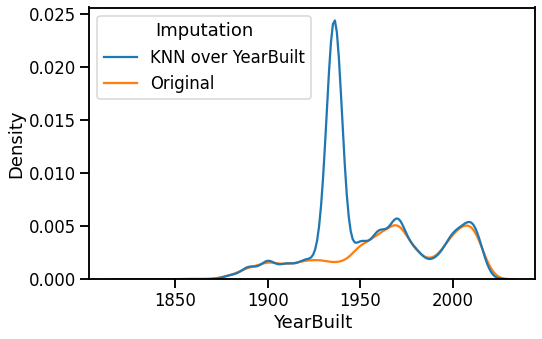

In [33]:
df_imp_year_built = df_imp.YearBuilt.to_frame()
df_imp_year_built['Imputation'] = 'KNN over YearBuilt'
df_year_built = df_.YearBuilt.dropna().to_frame()
df_year_built['Imputation'] = 'Original'
data = pd.concat([df_imp_year_built, df_year_built], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='YearBuilt', hue='Imputation')

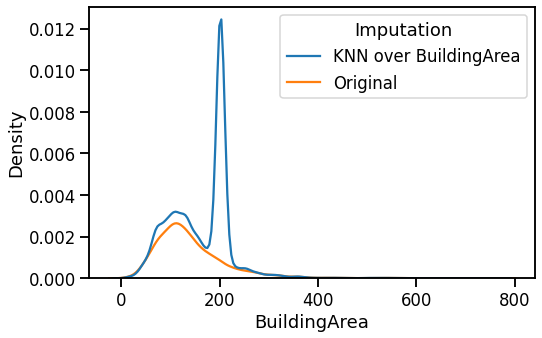

In [34]:
df_imp_build_area = df_imp.BuildingArea.to_frame()
df_imp_build_area['Imputation'] = 'KNN over BuildingArea'
df_build_area = df_.BuildingArea.dropna().to_frame()
df_build_area['Imputation'] = 'Original'
data = pd.concat([df_imp_build_area, df_build_area], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='BuildingArea', hue='Imputation')

Graficamos las variables 'YearBuilt' y 'BuildingArea' antes y después de realizar imputación

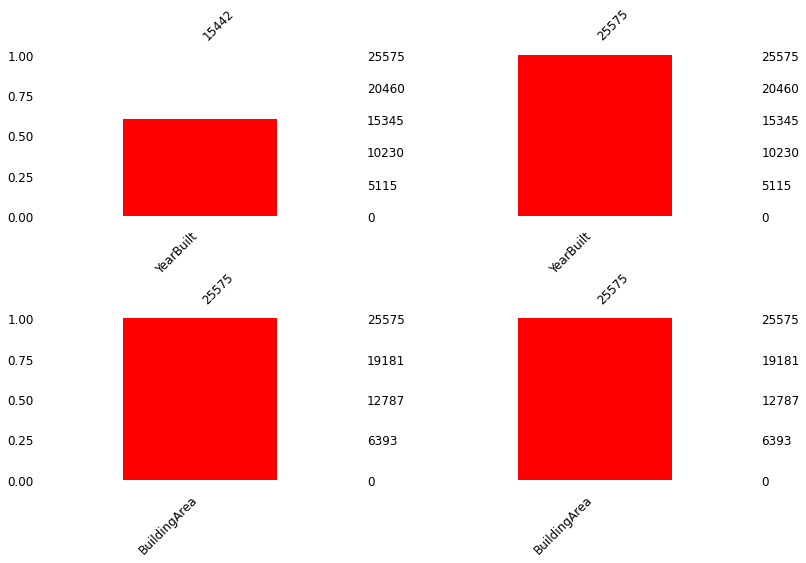

In [40]:
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(12,8), sharey=True)
msno.bar(df_[['YearBuilt']], fontsize=12, color='red', ax=axes[0,0])
msno.bar(df_imp[['YearBuilt']], fontsize=12, color='red', ax=axes[0,1])
plt.tight_layout(pad= 2)
msno.bar(df_imp[['BuildingArea']], fontsize=12, color='red', ax=axes[1,0])
msno.bar(df_imp[['BuildingArea']], fontsize=12, color='red', ax=axes[1,1]);

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

#**RESOLUCIÓN EJERCICIO 3**

3.1 Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos


**Dado que los distintos atributos de nuestro dataset están expresados en diferentes unidades se hace necesario estandarizar sus valores, ya que el método de PCA identifica las direcciones con mayor varianza. Como la varianza de una variable se mide en sus mismas unidades elevadas al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media cero y desviación estándar uno, aquellas variables cuya escala sea mayor dominarán al resto. Por lo tanto es recomendable estandarizar siempre los datos.**

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
#imprimimos nombre de cada columna para utilizarlas en la estandarización
df_imp.columns

Index(['YearBuilt', 'BuildingArea', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Regionname_Eastern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Victoria', 'Regionname_Western Victoria', 'Type_h',
       'Type_u', 'Type_t', 'Car', 'Price', 'Postcode', 'Rooms',
       'AirB_record_count', 'AirB_daily_price_mean', 'AirB_weekly_price_mean',
       'AirB_monthly_price_mean'],
      dtype='object')

In [44]:
columns_escala = ['YearBuilt', 'BuildingArea', 'Regionname_Northern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan',
       'Regionname_Eastern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Victoria', 'Regionname_Western Victoria', 'Type_h',
       'Type_u', 'Type_t', 'Car', 'Price', 'Postcode', 'Rooms',
       'AirB_record_count', 'AirB_daily_price_mean', 'AirB_weekly_price_mean',
       'AirB_monthly_price_mean']

In [45]:
escala = MinMaxScaler()
escala.fit(df_imp[columns_escala])
df_imp.loc[:, columns_escala] = escala.transform(df_imp[columns_escala])

In [46]:
df_imp

,YearBuilt,BuildingArea,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,...,Type_u,Type_t,Car,Price,Postcode,Rooms,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,0.563830,0.253968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.456835,0.068577,0.111111,0.061897,0.072134,0.036717,0.037671
1,0.563830,0.253968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.456835,0.068577,0.111111,0.039389,0.054052,0.277056,0.239313
2,0.372340,0.091270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.296763,0.068577,0.111111,0.061897,0.072134,0.036717,0.037671
3,0.372340,0.091270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.296763,0.068577,0.111111,0.039389,0.054052,0.277056,0.239313
4,0.372340,0.185185,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.451439,0.068577,0.222222,0.061897,0.072134,0.036717,0.037671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25570,0.888298,0.254233,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.345324,0.016377,0.222222,0.006833,0.091833,0.227769,0.165222
25571,0.478723,0.194444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.833333,0.823741,0.016377,0.333333,0.020498,0.115806,0.187801,0.146934
25572,0.478723,0.194444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.833333,0.823741,0.016377,0.333333,0.006833,0.091833,0.227769,0.165222
25573,0.478723,0.134921,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.386691,0.013306,0.333333,0.015675,0.062786,NaN,NaN


**Para aplicar el método de PCA, verificamos nuevamente la existencia de valores NAN, ya que su eventual presencia no permite correr el método apropiadamente.**

In [47]:
#Mostramos en qué columnas se encuentran los valores NaN:
df_imp.isnull().any()

YearBuilt                                False
BuildingArea                             False
Regionname_Northern Metropolitan         False
Regionname_Western Metropolitan          False
Regionname_Southern Metropolitan         False
Regionname_Eastern Metropolitan          False
Regionname_South-Eastern Metropolitan    False
Regionname_Eastern Victoria              False
Regionname_Northern Victoria             False
Regionname_Western Victoria              False
Type_h                                   False
Type_u                                   False
Type_t                                   False
Car                                      False
Price                                    False
Postcode                                 False
Rooms                                    False
AirB_record_count                         True
AirB_daily_price_mean                     True
AirB_weekly_price_mean                    True
AirB_monthly_price_mean                   True
dtype: bool

Dado que tenemos registros con valores NAN, decidimos volver a imputar

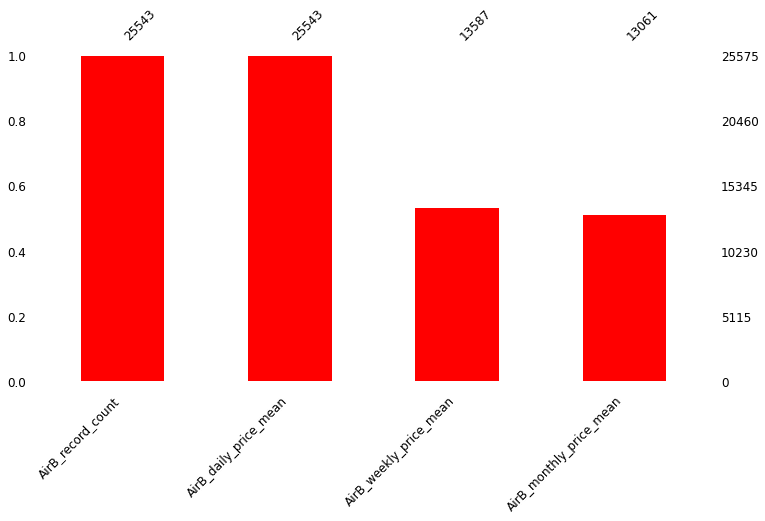

In [48]:
msno.bar(df_imp[['AirB_record_count','AirB_daily_price_mean','AirB_weekly_price_mean','AirB_monthly_price_mean' ]],figsize=(12, 6), fontsize=12, color='red');

In [49]:
#Imputamos los atributos 'AirB_record_count','AirB_daily_price_mean','AirB_weekly_price_mean','AirB_monthly_price_mean'
df_imp2 = df_imp.copy(deep=True)

knn_imputer2 = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp2[['AirB_record_count','AirB_daily_price_mean','AirB_weekly_price_mean','AirB_monthly_price_mean']] = knn_imputer2.fit_transform(
    df_imp2[['AirB_record_count','AirB_daily_price_mean','AirB_weekly_price_mean','AirB_monthly_price_mean']])

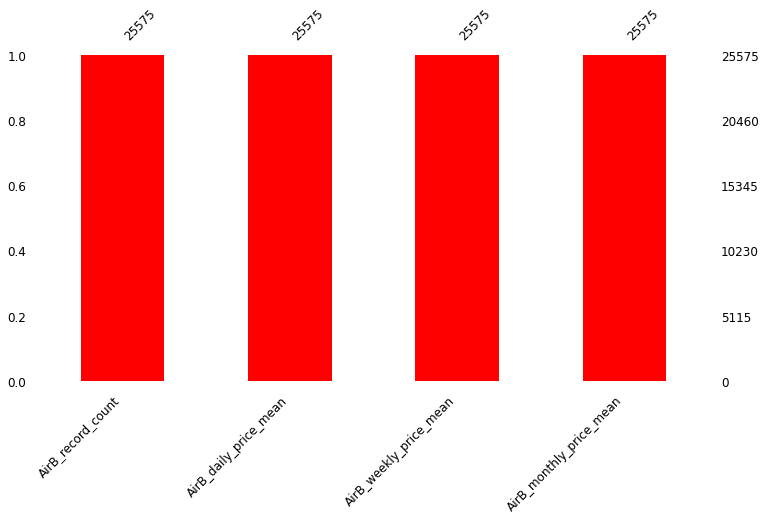

In [50]:
msno.bar(df_imp2[['AirB_record_count','AirB_daily_price_mean','AirB_weekly_price_mean','AirB_monthly_price_mean' ]],figsize=(12, 6), fontsize=12, color='red');

In [51]:
#Imprimimos el dataframe imputado por segunda vez
df_imp2

,YearBuilt,BuildingArea,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,...,Type_u,Type_t,Car,Price,Postcode,Rooms,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,0.563830,0.253968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.456835,0.068577,0.111111,0.061897,0.072134,0.036717,0.037671
1,0.563830,0.253968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.456835,0.068577,0.111111,0.039389,0.054052,0.277056,0.239313
2,0.372340,0.091270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.296763,0.068577,0.111111,0.061897,0.072134,0.036717,0.037671
3,0.372340,0.091270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.296763,0.068577,0.111111,0.039389,0.054052,0.277056,0.239313
4,0.372340,0.185185,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.451439,0.068577,0.222222,0.061897,0.072134,0.036717,0.037671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25570,0.888298,0.254233,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.345324,0.016377,0.222222,0.006833,0.091833,0.227769,0.165222
25571,0.478723,0.194444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.833333,0.823741,0.016377,0.333333,0.020498,0.115806,0.187801,0.146934
25572,0.478723,0.194444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.833333,0.823741,0.016377,0.333333,0.006833,0.091833,0.227769,0.165222
25573,0.478723,0.134921,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.386691,0.013306,0.333333,0.015675,0.062786,0.289021,0.214535


**Entrenamos la instancia de la clase PCA**



Aplicamos el método de PCA para el total de atributos

In [52]:
from sklearn.decomposition import PCA

n_comp=21
pca = PCA(n_comp)
princ_comp = pca.fit(df_imp2)
var_expl = pca.explained_variance_
prop_var_expl = pca.explained_variance_ratio_

Graficamos la Proporción de Varianza Explicada acumulada para todas las componentes

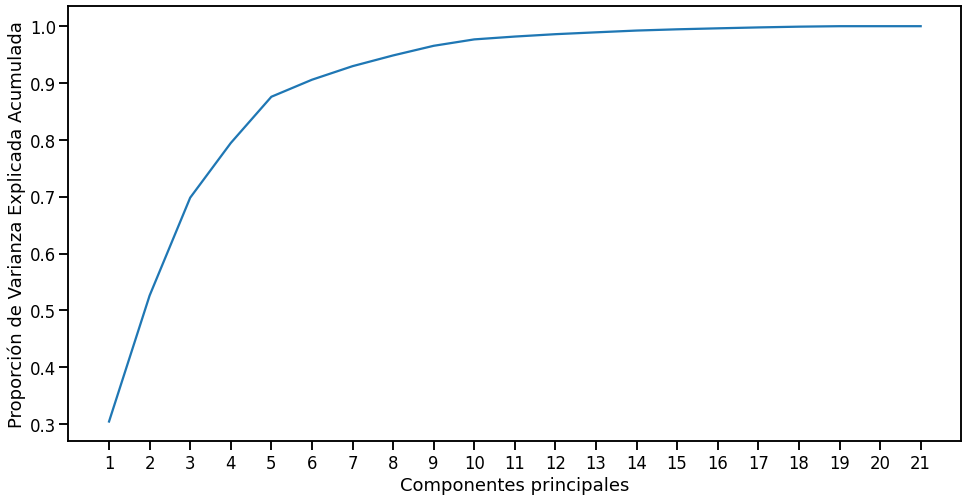

In [53]:
eje_y = np.cumsum(prop_var_expl)
fig,ax = plt.subplots(figsize = [16,8])
ax.plot([str(i) for i in range(1,n_comp+1)], eje_y)
plt.xlabel('Componentes principales')
plt.ylabel("Proporción de Varianza Explicada Acumulada")
plt.show()

**Observamos que a partir de 7 componentes el incremento en la Proporción de la Varianza Explicada Acumulada deja de ser sustancial. Decidimos si elegimos 7 u 8 componenetes imprimendo la suma de la Proporción de la Varianza explicada.**

In [54]:
#Imprimos la suma de la proporción de la varianza explicada para decidir 
#cantidad de componentes. 
np.cumsum(pca.explained_variance_ratio_)

array([0.30451084, 0.52615036, 0.69832244, 0.7944897 , 0.87586191,
       0.90580361, 0.92964493, 0.94856017, 0.9654971 , 0.97677713,
       0.98176217, 0.98593727, 0.98919568, 0.99231986, 0.9945004 ,
       0.9962314 , 0.99783435, 0.99915896, 1.        , 1.        ,
       1.        ])

De los resultados anterioriores vemos que 8 componentes resultan suficientes para explicar los datos considerando el 97% del total de datos.

In [55]:
#Aplicamos PCA para el número de componentes que 
#decidimos en el paso anterior
n_comp=8
pca = PCA(n_comp)
princ_comp = pca.fit(df_imp2)
"""Cada número es el peso que se le asigna a los 21 atributos y luego se
"suma la multiplicación del peso*atributo para obtener la componente principal"""
var_expl = pca.explained_variance_
prop_var_expl = pca.explained_variance_ratio_

3.2 Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.

Porcentaje de varianza explicada por cada componente

In [56]:
porc=((prop_var_expl)*100)
porc

array([30.45108355, 22.16395283, 17.21720762,  9.61672585,  8.13722113,
        2.99416994,  2.38413243,  1.89152321])

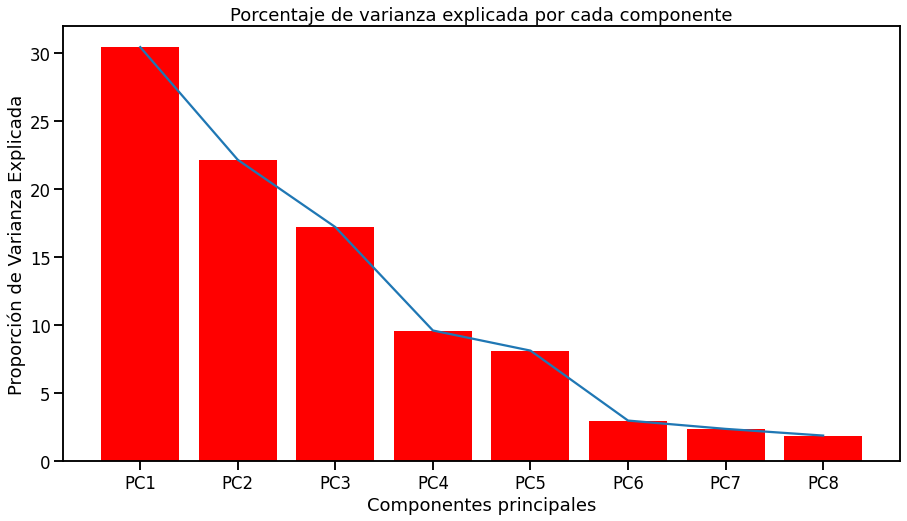

In [57]:
fig,ax = plt.subplots(figsize =[15,8])
ax.bar(x = [f"PC" + str(i) for i in range(1,n_comp+1)], height=porc, color="red")
ax.plot([f"PC" + str(i) for i in range(1,n_comp+1)], porc)
ax.set_title('Porcentaje de varianza explicada por cada componente')
plt.xlabel('Componentes principales')
plt.ylabel("Proporción de Varianza Explicada")
plt.show()

**En el gráfico anterior observamos que la primera componente explica el 30% de la varianza observada en los datos y la segunda el 22%. Las dos últimas componentes no superan por separado el 3% de la varianza.**

3.3 En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [58]:
df_pca= pca.transform(df_imp2)
df_components = pd.DataFrame(data=df_pca,
    columns =[f"PC" + str(i) for i in range(1,n_comp+1)])
df_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.580299,0.500703,-0.521109,-0.169893,-0.022006,-0.057495,-0.075180,-0.079445
1,-0.548834,0.475197,-0.534921,-0.177159,-0.032900,-0.111244,0.183914,-0.003968
2,-0.564455,0.535018,-0.511038,-0.187436,-0.058403,-0.082302,-0.013901,-0.363244
3,-0.532990,0.509512,-0.524850,-0.194702,-0.069298,-0.136051,0.245192,-0.287766
4,-0.588631,0.495481,-0.533429,-0.183799,-0.045316,-0.106032,0.010360,-0.255939
...,...,...,...,...,...,...,...,...
25570,-0.598289,-0.159944,0.754942,-0.225938,-0.011688,0.015943,-0.083641,0.405524
25571,-0.680674,-0.283222,0.670221,-0.245386,-0.021174,-0.103025,0.052416,0.553246
25572,-0.677042,-0.286600,0.668981,-0.245880,-0.022426,-0.109735,0.084203,0.562374
25573,-0.594765,-0.172604,0.719714,-0.265939,-0.071555,-0.133567,0.209383,-0.054261


In [59]:
# Añadimos el dataframe que se creó al aplicar PCA al dataframe imputado df_imp2
df_final= pd.concat([df_imp2, df_components], axis = 1)
df_final

,YearBuilt,BuildingArea,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,...,AirB_weekly_price_mean,AirB_monthly_price_mean,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.563830,0.253968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036717,0.037671,-0.580299,0.500703,-0.521109,-0.169893,-0.022006,-0.057495,-0.075180,-0.079445
1,0.563830,0.253968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.277056,0.239313,-0.548834,0.475197,-0.534921,-0.177159,-0.032900,-0.111244,0.183914,-0.003968
2,0.372340,0.091270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036717,0.037671,-0.564455,0.535018,-0.511038,-0.187436,-0.058403,-0.082302,-0.013901,-0.363244
3,0.372340,0.091270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.277056,0.239313,-0.532990,0.509512,-0.524850,-0.194702,-0.069298,-0.136051,0.245192,-0.287766
4,0.372340,0.185185,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036717,0.037671,-0.588631,0.495481,-0.533429,-0.183799,-0.045316,-0.106032,0.010360,-0.255939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25570,0.888298,0.254233,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.227769,0.165222,-0.598289,-0.159944,0.754942,-0.225938,-0.011688,0.015943,-0.083641,0.405524
25571,0.478723,0.194444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.187801,0.146934,-0.680674,-0.283222,0.670221,-0.245386,-0.021174,-0.103025,0.052416,0.553246
25572,0.478723,0.194444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.227769,0.165222,-0.677042,-0.286600,0.668981,-0.245880,-0.022426,-0.109735,0.084203,0.562374
25573,0.478723,0.134921,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.289021,0.214535,-0.594765,-0.172604,0.719714,-0.265939,-0.071555,-0.133567,0.209383,-0.054261


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

#**RESOLUCIÓN EJERCICIO 4**

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

**En el item 3.3 resolvimos trabajar directamente con los dataframes. Unimos el daframe obtenido al aplicar PCA con el dataframe en el que habíamos imputado los valores a aquellos atributos que tenían valores NAN. El conjunto de datos procesados es el dataframe *df_final*.**

In [60]:
df_final

,YearBuilt,BuildingArea,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,...,AirB_weekly_price_mean,AirB_monthly_price_mean,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.563830,0.253968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036717,0.037671,-0.580299,0.500703,-0.521109,-0.169893,-0.022006,-0.057495,-0.075180,-0.079445
1,0.563830,0.253968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.277056,0.239313,-0.548834,0.475197,-0.534921,-0.177159,-0.032900,-0.111244,0.183914,-0.003968
2,0.372340,0.091270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036717,0.037671,-0.564455,0.535018,-0.511038,-0.187436,-0.058403,-0.082302,-0.013901,-0.363244
3,0.372340,0.091270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.277056,0.239313,-0.532990,0.509512,-0.524850,-0.194702,-0.069298,-0.136051,0.245192,-0.287766
4,0.372340,0.185185,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036717,0.037671,-0.588631,0.495481,-0.533429,-0.183799,-0.045316,-0.106032,0.010360,-0.255939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25570,0.888298,0.254233,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.227769,0.165222,-0.598289,-0.159944,0.754942,-0.225938,-0.011688,0.015943,-0.083641,0.405524
25571,0.478723,0.194444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.187801,0.146934,-0.680674,-0.283222,0.670221,-0.245386,-0.021174,-0.103025,0.052416,0.553246
25572,0.478723,0.194444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.227769,0.165222,-0.677042,-0.286600,0.668981,-0.245880,-0.022426,-0.109735,0.084203,0.562374
25573,0.478723,0.134921,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.289021,0.214535,-0.594765,-0.172604,0.719714,-0.265939,-0.071555,-0.133567,0.209383,-0.054261


Transformamos el dataframe **df_final** a archivo de texto plano para luego ser descargado de ser necesario.

In [61]:
df_final.to_csv("df_final_AyC_Grupo32.csv", index=None)


In [62]:
#from google.colab import files
#files.download('df_final_AyC_Grupo32.csv')

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
